In [53]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [54]:
data = pd.read_csv('/content/drive/MyDrive/Spam_ham_sms_classifier/spam.csv',encoding = "ISO-8859-1")

In [55]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [56]:
data.shape

(5572, 5)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [58]:
# drop the last 3 columns

data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [59]:
data.sample(5)

,v1,v2
2472,spam,Final Chance! Claim ur å£150 worth of discount...
3257,ham,He fucking chickened out. He messaged me he wo...
1919,ham,Yar i wanted 2 scold u yest but late already.....
4980,ham,I said its okay. Sorry
3659,ham,I will reach ur home in &lt;#&gt; minutes


In [60]:
data.rename(columns={'v1':'Target','v2':'Message'},inplace = True)

In [61]:
data.head(10)

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [62]:
data['Target'].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()


In [64]:
data['Target'] = en.fit_transform(data['Target'])

In [65]:
data.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
# check for null values
data.isnull().sum()

Target     0
Message    0
dtype: int64

In [67]:
# check for duplicate values
data.duplicated().sum()

403

In [68]:
# remove duplictae
data = data.drop_duplicates(keep='first')

In [69]:
data.duplicated().sum()

0

## **Data Visualization**

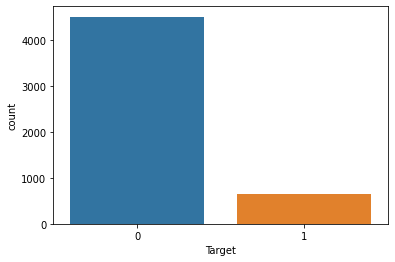

In [70]:
# value_count plot
sns.countplot(x='Target',data = data)


Data is imbalanced

proportion of spam messages is less. 

In [71]:
import nltk

In [72]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
data['num_characters'] = data['Message'].apply(len)

In [74]:
data.head()

,Target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [75]:
# no.of words
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [76]:
data.head()

,Target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [77]:
data['num_sentence'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [78]:
data.head()

,Target,Message,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


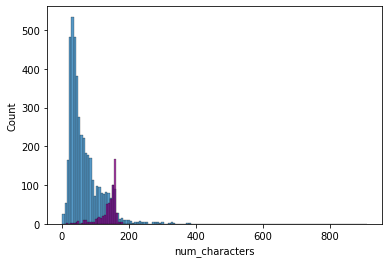

In [85]:

sns.histplot(data[data['Target']==0]['num_characters'])
sns.histplot(data[data['Target']==1]['num_characters'], color = 'purple')

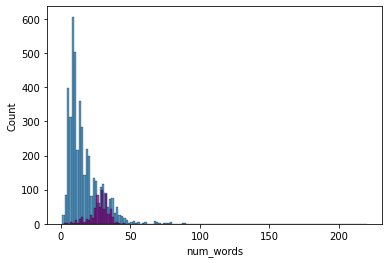

In [87]:
sns.histplot(data[data['Target']==0]['num_words'])
sns.histplot(data[data['Target']==1]['num_words'],color = 'purple')

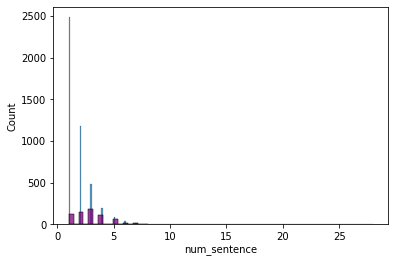

In [88]:
sns.histplot(data[data['Target']==0]['num_sentence'])
sns.histplot(data[data['Target']==1]['num_sentence'],color = 'purple')

In [90]:
# finding the correlation

data.corr()

,Target,num_characters,num_words,num_sentence
Target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentence,0.284901,0.638143,0.684541,1.000000


num_words highly correlated with num_characters.Num_characters highly correlated with num_sentences.

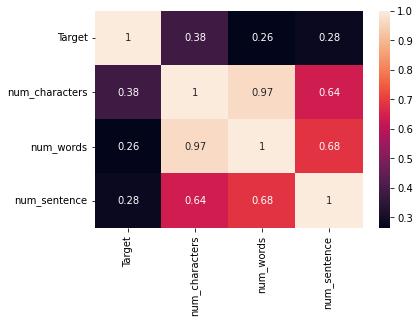

In [92]:
sns.heatmap(data=data.corr(),annot= True)

## **Data Preprocessing**



*   make it lower case
*   tokenize the words

*   remove special characters
*   remove stopwords


*   remove punctuations









In [100]:
import string
from nltk.corpus import stopwords

In [112]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


'laugh'

In [103]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

In [115]:
def preprocess_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)
  # text = text.nltk.word_tokenize()

In [116]:
preprocess_text('I am Sam, Whats up? % @ __,i will got to school.Dont wor"k hards..make it smart')

'sam what got wor k hard make smart'

In [117]:
data['transformed_text'] = data['Message'].apply(preprocess_text)

## **Model Building**

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [148]:
tv = TfidfVectorizer(max_features = 3000)

In [149]:
X = tv.fit_transform(data['transformed_text']).toarray()

In [150]:
X.shape

(5169, 3000)

In [151]:
y = data['Target'].values

In [152]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [155]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [156]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [157]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[782 126]
 [ 19 107]]
0.4592274678111588


In [158]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[908   0]
 [ 37  89]]
1.0


In [159]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
[[908   0]
 [ 25 101]]
1.0


In [160]:
import pickle
pickle.dump(tv,open('tfvectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))